In [1]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [2]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

### 1. Generate Data

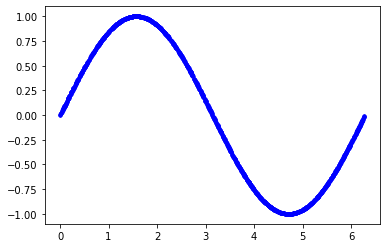

In [3]:
# Number of sample datapoints
SAMPLES = 2000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise

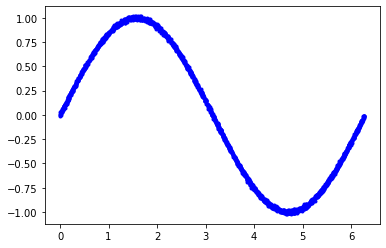

In [4]:
# Add a small random number to each y value
y_values += 0.01 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data

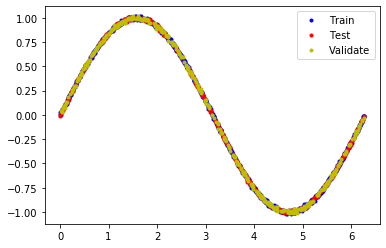

In [5]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

### 4. Design the Model

In [19]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [29]:
print("x train's shape = ", x_train.shape)

print("y train's shape = ", y_train.shape)

x train's shape =  (1200,)
y train's shape =  (1200,)


### 5. Train the Model

In [21]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 0.5722 - mae: 0.6840 - val_loss: 0.4765 - val_mae: 0.6117
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4850 - mae: 0.6199 - val_loss: 0.4372 - val_mae: 0.5765
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4640 - mae: 0.5990 - val_loss: 0.4115 - val_mae: 0.5543
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4208 - mae: 0.5637 - val_loss: 0.3902 - val_mae: 0.5389
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4182 - mae: 0.5658 - val_loss: 0.3714 - val_mae: 0.5264
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3890 - mae: 0.5428 - val_loss: 0.3557 - val_mae: 0.5147
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3574 - mae: 0.5158 - val_loss: 0.3400 - val_mae: 0.5046
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3412 - m

Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.3163 - val_loss: 0.1686 - val_mae: 0.3306
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1500 - mae: 0.3180 - val_loss: 0.1696 - val_mae: 0.3311
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3244 - val_loss: 0.1688 - val_mae: 0.3307
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1491 - mae: 0.3153 - val_loss: 0.1678 - val_mae: 0.3301
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.3166 - val_loss: 0.1702 - val_mae: 0.3312
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1581 - mae: 0.3293 - val_loss: 0.1682 - val_mae: 0.3301
Epoch 131/500
19/19 [==============================] - 0s 9ms/step - loss: 0.1609 - mae: 0.3330 - val_loss: 0.1691 - val_mae: 0.3305
Epoch 132/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1420 - mae: 0.3081 - val_loss: 0.1682 - val_mae: 0.3232
Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1392 - mae: 0.3008 - val_loss: 0.1652 - val_mae: 0.3217
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1526 - mae: 0.3153 - val_loss: 0.1661 - val_mae: 0.3223
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.3002 - val_loss: 0.1640 - val_mae: 0.3211
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1479 - mae: 0.3112 - val_loss: 0.1649 - val_mae: 0.3214
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.3069 - val_loss: 0.1639 - val_mae: 0.3210
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1415 - mae: 0.3038 - val_loss: 0.1653 - val_mae: 0.3215
Epoch 254/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1436 -

Epoch 309/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1418 - mae: 0.3036 - val_loss: 0.1638 - val_mae: 0.3184
Epoch 310/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1456 - mae: 0.3056 - val_loss: 0.1641 - val_mae: 0.3187
Epoch 311/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1469 - mae: 0.3040 - val_loss: 0.1648 - val_mae: 0.3190
Epoch 312/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.3047 - val_loss: 0.1628 - val_mae: 0.3178
Epoch 313/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1476 - mae: 0.3099 - val_loss: 0.1638 - val_mae: 0.3185
Epoch 314/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1478 - mae: 0.3082 - val_loss: 0.1631 - val_mae: 0.3179
Epoch 315/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.3186 - val_loss: 0.1641 - val_mae: 0.3186
Epoch 316/500
19/19 [==============================] - 0s 2ms/step - 

Epoch 432/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3126 - val_loss: 0.1660 - val_mae: 0.3162
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1439 - mae: 0.2989 - val_loss: 0.1631 - val_mae: 0.3147
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1385 - mae: 0.2989 - val_loss: 0.1609 - val_mae: 0.3136
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.2995 - val_loss: 0.1628 - val_mae: 0.3144
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1367 - mae: 0.2935 - val_loss: 0.1613 - val_mae: 0.3137
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1504 - mae: 0.3034 - val_loss: 0.1642 - val_mae: 0.3153
Epoch 438/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1479 - mae: 0.3023 - val_loss: 0.1617 - val_mae: 0.3139
Epoch 439/500
19/19 [==============================] - 0s 2ms/step - 

### 6. Plot Metrics

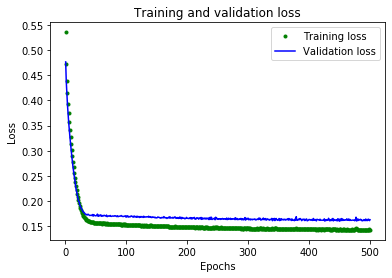

In [30]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

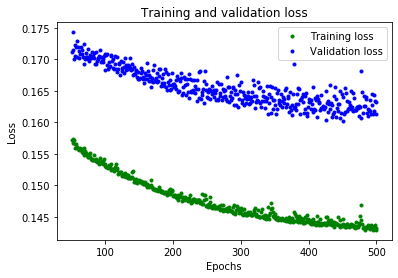

In [31]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

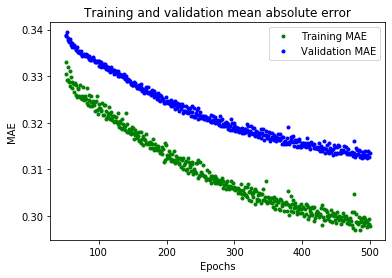

In [32]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

13/13 [==============================] - 0s 440us/step - loss: 0.1430 - mae: 0.2928


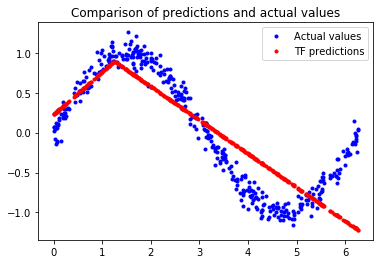

In [33]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

## Training a Larger Model

In [35]:
## Now we change the shape of dense layer 1, on above, we use 8 neurons,
## here we use 16 neurons, by this we add more parameters in the 
## network, but finally you will find that it is useless :(
## To get preciser result, we must change network structure!


model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
#model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [36]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/500
19/19 [==============================] - 0s 5ms/step - loss: 1.0346 - mae: 0.9069 - val_loss: 0.7204 - val_mae: 0.7128
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6283 - mae: 0.6492 - val_loss: 0.4785 - val_mae: 0.5649
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4623 - mae: 0.5515 - val_loss: 0.4037 - val_mae: 0.5332
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4020 - mae: 0.5387 - val_loss: 0.3802 - val_mae: 0.5268
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4057 - mae: 0.5521 - val_loss: 0.3678 - val_mae: 0.5211
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5370 - val_loss: 0.3595 - val_mae: 0.5157
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3627 - mae: 0.5176 - val_loss: 0.3505 - val_mae: 0.5104
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3536 - m

19/19 [==============================] - 0s 2ms/step - loss: 0.1534 - mae: 0.3177 - val_loss: 0.1648 - val_mae: 0.3235
Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.3075 - val_loss: 0.1656 - val_mae: 0.3235
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.3104 - val_loss: 0.1671 - val_mae: 0.3241
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1515 - mae: 0.3158 - val_loss: 0.1657 - val_mae: 0.3235
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1449 - mae: 0.3061 - val_loss: 0.1645 - val_mae: 0.3230
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1433 - mae: 0.3087 - val_loss: 0.1685 - val_mae: 0.3245
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3207 - val_loss: 0.1648 - val_mae: 0.3228
Epoch 131/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1576 -

Epoch 247/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1410 - mae: 0.3036 - val_loss: 0.1695 - val_mae: 0.3196
Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1375 - mae: 0.2954 - val_loss: 0.1635 - val_mae: 0.3169
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.3097 - val_loss: 0.1656 - val_mae: 0.3180
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1370 - mae: 0.2934 - val_loss: 0.1621 - val_mae: 0.3163
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.3058 - val_loss: 0.1635 - val_mae: 0.3169
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1427 - mae: 0.3011 - val_loss: 0.1621 - val_mae: 0.3163
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.2977 - val_loss: 0.1635 - val_mae: 0.3167
Epoch 254/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.2971 - val_loss: 0.1638 - val_mae: 0.3137
Epoch 370/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.2994 - val_loss: 0.1636 - val_mae: 0.3137
Epoch 371/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1421 - mae: 0.2974 - val_loss: 0.1603 - val_mae: 0.3122
Epoch 372/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1412 - mae: 0.2970 - val_loss: 0.1648 - val_mae: 0.3140
Epoch 373/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.2972 - val_loss: 0.1611 - val_mae: 0.3124
Epoch 374/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1321 - mae: 0.2902 - val_loss: 0.1608 - val_mae: 0.3122
Epoch 375/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.2970 - val_loss: 0.1615 - val_mae: 0.3126
Epoch 376/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 -

Epoch 431/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1433 - mae: 0.2970 - val_loss: 0.1611 - val_mae: 0.3113
Epoch 432/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3097 - val_loss: 0.1676 - val_mae: 0.3143
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1436 - mae: 0.2958 - val_loss: 0.1620 - val_mae: 0.3117
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.2962 - val_loss: 0.1598 - val_mae: 0.3109
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.2978 - val_loss: 0.1625 - val_mae: 0.3118
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1358 - mae: 0.2904 - val_loss: 0.1604 - val_mae: 0.3110
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1497 - mae: 0.3011 - val_loss: 0.1643 - val_mae: 0.3130
Epoch 438/500
19/19 [==============================] - 0s 2ms/step - 

Epoch 492/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1385 - mae: 0.2892 - val_loss: 0.1600 - val_mae: 0.3102
Epoch 493/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1435 - mae: 0.2966 - val_loss: 0.1647 - val_mae: 0.3119
Epoch 494/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1313 - mae: 0.2867 - val_loss: 0.1628 - val_mae: 0.3111
Epoch 495/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1322 - mae: 0.2875 - val_loss: 0.1604 - val_mae: 0.3101
Epoch 496/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1401 - mae: 0.2975 - val_loss: 0.1613 - val_mae: 0.3106
Epoch 497/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.2944 - val_loss: 0.1643 - val_mae: 0.3119
Epoch 498/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1395 - mae: 0.2918 - val_loss: 0.1639 - val_mae: 0.3117
Epoch 499/500
19/19 [==============================] - 0s 2ms/step - 

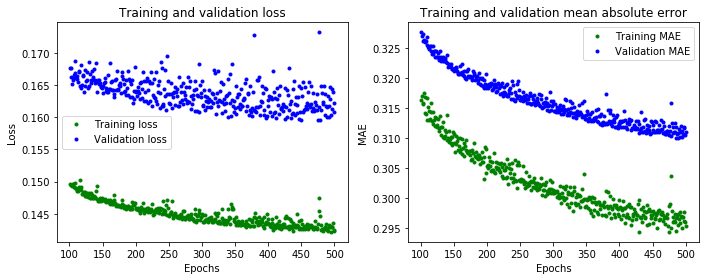

In [37]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

In [7]:
## Here we update the network's structure: add one more dense layer
## and add more neurons for 1st layer

model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/500
19/19 [==============================] - 0s 3ms/step - loss: 2.2682e-04 - mae: 0.0120 - val_loss: 2.1332e-04 - val_mae: 0.0117
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8324e-04 - mae: 0.0109 - val_loss: 2.0222e-04 - val_mae: 0.0111
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0654e-04 - mae: 0.0116 - val_loss: 2.2426e-04 - val_mae: 0.0115
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1286e-04 - mae: 0.0116 - val_loss: 1.7367e-04 - val_mae: 0.0101
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0219e-04 - mae: 0.0115 - val_loss: 1.9729e-04 - val_mae: 0.0108
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8095e-04 - mae: 0.0107 - val_loss: 1.7669e-04 - val_mae: 0.0104
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8190e-04 - mae: 0.0110 - val_loss: 3.5705e-04 - val_mae: 0.0155
Epoch 8/500
19/19 [========

19/19 [==============================] - 0s 2ms/step - loss: 1.8044e-04 - mae: 0.0108 - val_loss: 2.3439e-04 - val_mae: 0.0124
Epoch 118/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8395e-04 - mae: 0.0110 - val_loss: 1.7888e-04 - val_mae: 0.0103
Epoch 119/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9217e-04 - mae: 0.0111 - val_loss: 1.6753e-04 - val_mae: 0.0099
Epoch 120/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8089e-04 - mae: 0.0108 - val_loss: 2.3733e-04 - val_mae: 0.0123
Epoch 121/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9933e-04 - mae: 0.0113 - val_loss: 1.9292e-04 - val_mae: 0.0108
Epoch 122/500
19/19 [==============================] - 0s 2ms/step - loss: 1.6739e-04 - mae: 0.0105 - val_loss: 1.8380e-04 - val_mae: 0.0104
Epoch 123/500
19/19 [==============================] - 0s 2ms/step - loss: 1.6703e-04 - mae: 0.0104 - val_loss: 2.1944e-04 - val_mae: 0.0116
Epoch 124/500
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 1.7937e-04 - mae: 0.0108 - val_loss: 1.9526e-04 - val_mae: 0.0109
Epoch 234/500
19/19 [==============================] - 0s 2ms/step - loss: 1.7126e-04 - mae: 0.0105 - val_loss: 1.8198e-04 - val_mae: 0.0106
Epoch 235/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8087e-04 - mae: 0.0108 - val_loss: 1.6796e-04 - val_mae: 0.0099
Epoch 236/500
19/19 [==============================] - 0s 3ms/step - loss: 1.8758e-04 - mae: 0.0110 - val_loss: 2.2805e-04 - val_mae: 0.0119
Epoch 237/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0128e-04 - mae: 0.0114 - val_loss: 1.8032e-04 - val_mae: 0.0103
Epoch 238/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9600e-04 - mae: 0.0112 - val_loss: 1.7787e-04 - val_mae: 0.0103
Epoch 239/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8995e-04 - mae: 0.0112 - val_loss: 2.6020e-04 - val_mae: 0.0130
Epoch 240/500
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 2.0276e-04 - mae: 0.0115 - val_loss: 2.1988e-04 - val_mae: 0.0115
Epoch 350/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1147e-04 - mae: 0.0118 - val_loss: 1.9430e-04 - val_mae: 0.0108
Epoch 351/500
19/19 [==============================] - 0s 4ms/step - loss: 1.9026e-04 - mae: 0.0110 - val_loss: 2.1660e-04 - val_mae: 0.0118
Epoch 352/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9471e-04 - mae: 0.0112 - val_loss: 1.8716e-04 - val_mae: 0.0106
Epoch 353/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9856e-04 - mae: 0.0112 - val_loss: 2.4806e-04 - val_mae: 0.0123
Epoch 354/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1818e-04 - mae: 0.0118 - val_loss: 3.0785e-04 - val_mae: 0.0144
Epoch 355/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2279e-04 - mae: 0.0120 - val_loss: 2.0721e-04 - val_mae: 0.0113
Epoch 356/500
19/19 [======

19/19 [==============================] - 0s 2ms/step - loss: 1.6578e-04 - mae: 0.0104 - val_loss: 1.7369e-04 - val_mae: 0.0102
Epoch 466/500
19/19 [==============================] - 0s 2ms/step - loss: 1.6728e-04 - mae: 0.0104 - val_loss: 1.8891e-04 - val_mae: 0.0105
Epoch 467/500
19/19 [==============================] - 0s 2ms/step - loss: 1.9169e-04 - mae: 0.0112 - val_loss: 2.8598e-04 - val_mae: 0.0138
Epoch 468/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2144e-04 - mae: 0.0121 - val_loss: 1.9009e-04 - val_mae: 0.0107
Epoch 469/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8019e-04 - mae: 0.0107 - val_loss: 2.0342e-04 - val_mae: 0.0113
Epoch 470/500
19/19 [==============================] - 0s 2ms/step - loss: 1.8155e-04 - mae: 0.0107 - val_loss: 2.0850e-04 - val_mae: 0.0113
Epoch 471/500
19/19 [==============================] - 0s 2ms/step - loss: 2.4422e-04 - mae: 0.0125 - val_loss: 2.4517e-04 - val_mae: 0.0123
Epoch 472/500
19/19 [======

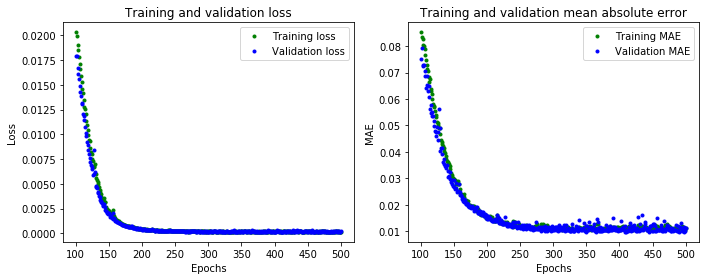

In [9]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

13/13 [==============================] - 0s 433us/step - loss: 1.9862e-04 - mae: 0.0114


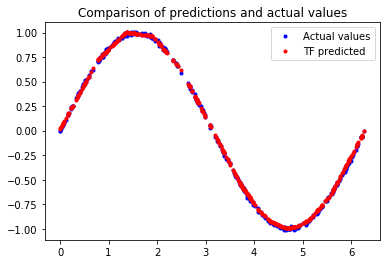

In [10]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

## Generate a TensorFlow Lite Model 

##### important!!!

In [13]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

2472

In [14]:

def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

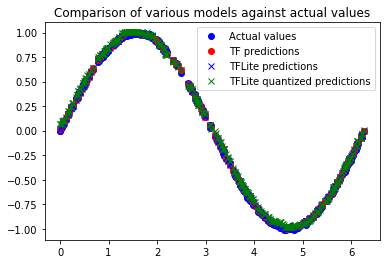

In [15]:
# Calculate predictions
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

# Compare predictions
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

In [17]:
# Calculate loss
loss_tf, _ = model.evaluate(x_test, y_test, verbose=0)
loss_no_quant_tflite = evaluate_tflite(model_no_quant_tflite, x_test, y_test)
loss_tflite = evaluate_tflite(model_tflite, x_test, y_test)

In [20]:
# Compare loss
df = pd.DataFrame.from_records(
    [["TensorFlow", loss_tf],
     ["TensorFlow Lite", loss_no_quant_tflite],
     ["TensorFlow Lite Quantized", loss_tflite]],
     columns = ["Model", "Loss/MSE"], index="Model").round(4)

df

,Loss/MSE
Model,
TensorFlow,0.0002
TensorFlow Lite,0.0002
TensorFlow Lite Quantized,0.0006


In [21]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

# Compare size
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,4096 bytes,
TensorFlow Lite,2780 bytes,(reduced by 1316 bytes)
TensorFlow Lite Quantized,2472 bytes,(reduced by 308 bytes)


In [6]:
# Install xxd if it is not available
#!sudo apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

In [7]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x94, 0x00, 0x00, 0x00, 0xc4, 0x00, 0x00, 0x00,
  0x18, 0x03, 0x00, 0x00, 0x28, 0x03, 0x00, 0x00, 0x1c, 0x09, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x6c, 0xf7, 0xff, 0xff, 0x10, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00,
  0x28, 0x00, 0x00, 0x00, 0x44, 0x00, 0x00, 0x00, 0x05, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x72, 0x76, 0x65, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61,
  0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xc0, 0xff, 0xff, 0xff, 0x09, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x07, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x32, 0x00,
  0x01, 0x